# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


# Libraries and datasets

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.dbscan import dbscan

from col_names import *
from utility import *

In [51]:
with open(f'{PICKLE_FOLDER}basket_prepared_df.pkl', 'rb') as f:
    b_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}item_prepared_df.pkl', 'rb') as f:
    i_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}user_prepared_df.pkl', 'rb') as f:
    u_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}shop_prepared_df.pkl', 'rb') as f:
    s_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}date_prepared_df.pkl', 'rb') as f:
    d_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}total_prepared_df.pkl', 'rb') as f:
    total_df = pickle.load(f)

In [52]:
with open(f'{PICKLE_FOLDER}pure_basket_prepared_df.pkl', 'rb') as f:
    pure_b_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_item_prepared_df.pkl', 'rb') as f:
    pure_i_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_user_prepared_df.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_shop_prepared_df.pkl', 'rb') as f:
    pure_s_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_date_prepared_df.pkl', 'rb') as f:
    pure_d_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_prepared_df.pkl', 'rb') as f:
    pure_df = pickle.load(f)

## Outliers

In [53]:
original_df = pd.read_csv('datasets/baskets_supermarket.csv')

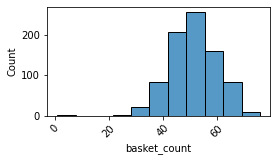

In [54]:
loghist(u_df, BCNT, '')

In [55]:
u_df[u_df[BCNT] < 20]

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,basket_count,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d
user_id,,,,,,,,,,,,,,,
824,824,5,5,5,-0.0,0.643775,1.609438,-0.0,5,1935.0,1,2,1,5.0,1.0


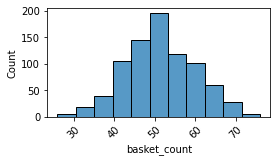

In [56]:
loghist(u_df.drop(824), BCNT, '')

In [57]:
original_df[original_df[USER] == 824]

,Unnamed: 0,date,shop_id,item_id,item_price,item_cnt_day,user_id,basket_id
15413,290750,NaN,22.0,NaN,349.0,1.0,824.0,B2824
15414,290006,01.03.2013,22.0,9460.0,NaN,1.0,824.0,B2824
15415,290614,NaN,22.0,NaN,149.0,1.0,824.0,B2824
15416,291389,01.03.2013,22.0,NaN,498.0,1.0,824.0,B2824
15417,290470,01.03.2013,22.0,16125.0,589.0,1.0,824.0,B2824


In [58]:
u_df = u_df.drop(824)

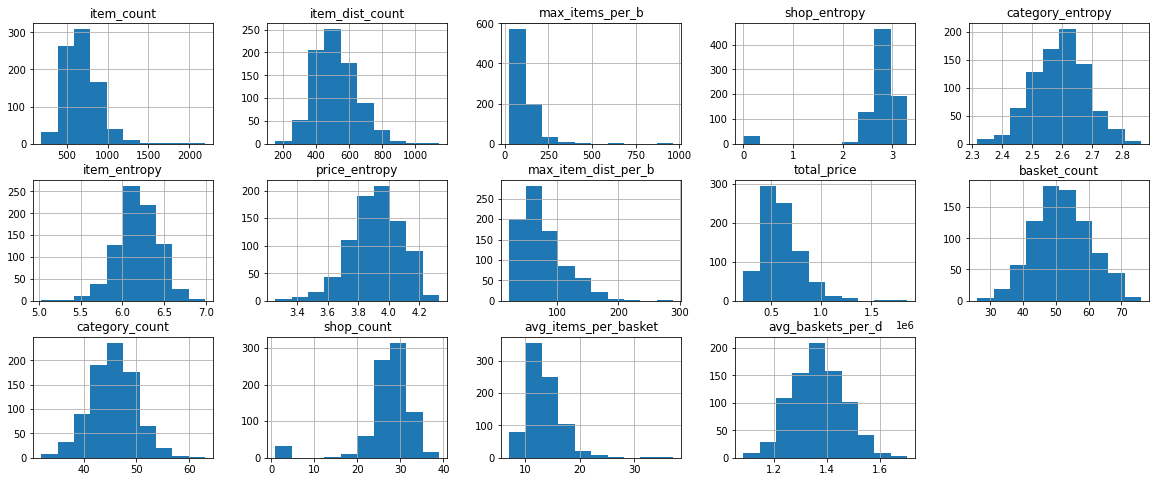

In [59]:
u_df.set_index(USER).hist(layout=(3, 5), figsize=(20, 8), bins=int(np.log2(len(u_df))+1))
plt.show()

In [60]:
# low shop count users
np.ceil(len(u_df[u_df[SCNT] < 5])/len(u_df) * 100)

4.0

In [61]:
u_df[u_df[ICNT] > 1200][ICNT].sort_values()

user_id
602    1232
11     1235
91     1248
645    1263
300    1292
351    1311
138    1312
571    1337
524    1364
255    1470
584    1485
565    1601
208    1816
192    2192
Name: item_count, dtype: int64

In [62]:
original_df[original_df[USER] == 192].groupby(BASKET)[CNT].sum().sort_values()

basket_id
B5112943      1.0
B5113535      1.0
B8617220      1.0
B5224397      1.0
B5133975      1.0
B8619468      1.0
B8231534      3.0
B5230069      3.0
B8619632      4.0
B8630980      4.0
B51943        5.0
B8625448      6.0
B8630016      6.0
B8218546      6.0
B5234141      6.0
B519455       6.0
B5135739      7.0
B829006       8.0
B5122567      8.0
B826430       8.0
B8612748      8.0
B5235525      8.0
B5122163      9.0
B514899       9.0
B8618504     12.0
B8226646     14.0
B8215758     16.0
B82946       17.0
B828646      17.0
B8220802     18.0
B511207      18.0
B821030      19.0
B864180      20.0
B5226365     23.0
B8227978     24.0
B5210057     26.0
B5224965     27.0
B527561      28.0
B5116099     30.0
B825306      33.0
B5134747     35.0
B5211489     37.0
B8230922     48.0
B528081      55.0
B528229      85.0
B5232753    154.0
B5229725    863.0
Name: item_cnt_day, dtype: float64

In [63]:
b_df.loc['B5229725']

basket_id                     B5229725
date               2014-05-10 00:00:00
user_id                            192
shop_id                              9
total_price             1055526.809779
item_count                         964
item_dist_count                    204
Name: B5229725, dtype: object

In [64]:
u_df[u_df[ICNT] < 200][ICNT].sort_values()

user_id
780    190
Name: item_count, dtype: int64

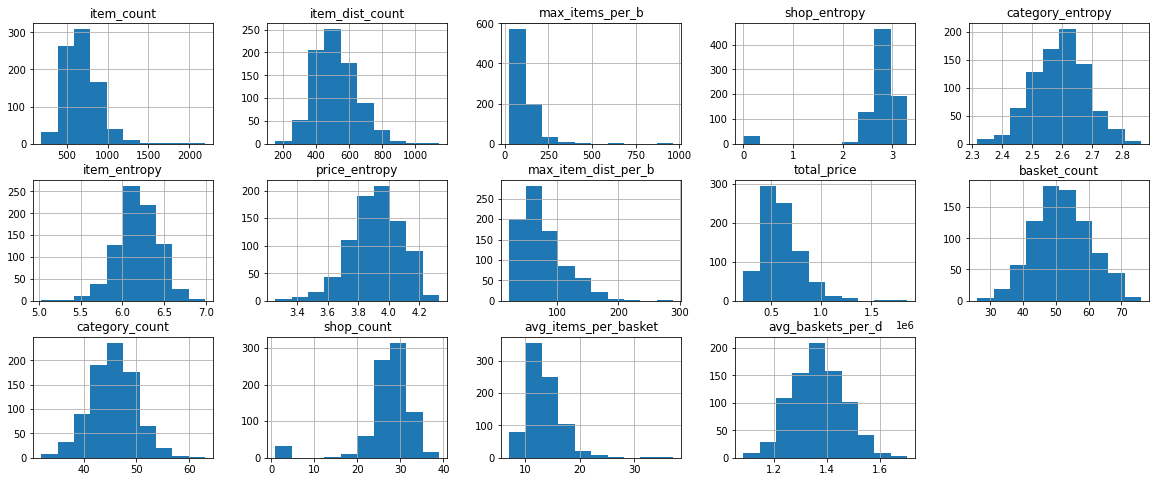

In [65]:
u_df.set_index(USER).hist(layout=(3, 5), figsize=(20, 8), bins=int(np.log2(len(u_df))+1))
plt.show()

In [66]:
u_df[u_df[MIDXB] > 200]

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,basket_count,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d
user_id,,,,,,,,,,,,,,,
192,192,2192,1002,964,2.753001,2.655546,6.861076,4.077537,204,1.854977e+06,59,46,30,37.152542,1.439024
565,565,1601,1142,302,2.636036,2.710644,6.991370,4.330733,206,1.359868e+06,76,54,37,21.065789,1.490196
699,699,1136,835,400,2.389980,2.593819,6.696755,4.121130,289,9.189372e+05,63,52,34,18.031746,1.400000
737,737,908,692,277,2.529338,2.607376,6.512916,4.115561,214,6.798168e+05,64,54,29,14.187500,1.523810


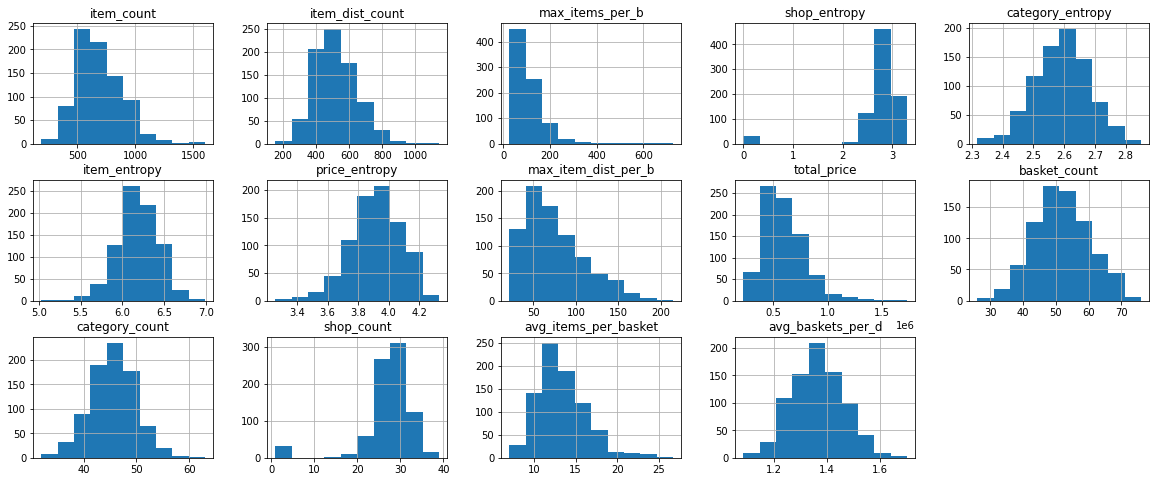

In [67]:
u_df.drop([192, 524, 208, 699]).set_index(USER).hist(layout=(3, 5), figsize=(20, 8), bins=int(np.log2(len(u_df))+1))
plt.show()

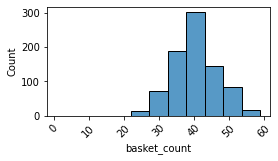

In [68]:
loghist(pure_u_df, BCNT, '')

In [69]:
pure_u_df[pure_u_df[BCNT] < 20]

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,basket_count,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d
user_id,,,,,,,,,,,,,,,
824,824,2,2,2,-0.0,0.693147,0.693147,-0.0,2,939.0,1,2,1,2.0,1.0


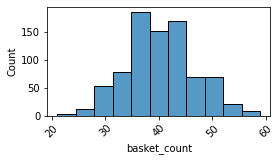

In [70]:
loghist(pure_u_df.drop(824), BCNT, '')

In [71]:
pure_u_df = pure_u_df.drop(824)

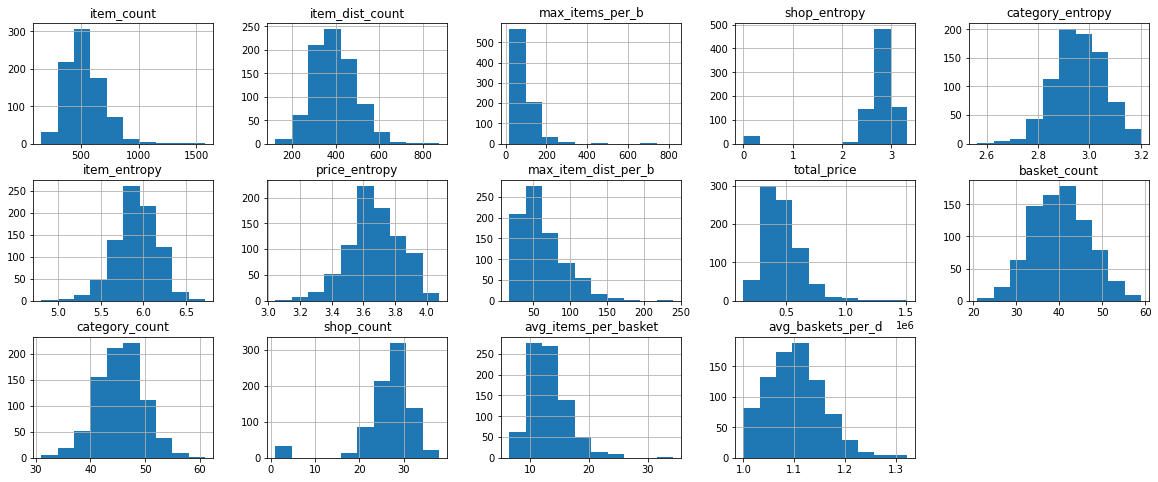

In [72]:
pure_u_df.set_index(USER).hist(layout= (3, 5), figsize = (20, 8), bins = int(np.log2(len(pure_u_df)) + 1))
plt.show()

In [73]:
# low shop count users
np.ceil(len(pure_u_df[pure_u_df[SCNT] < 5])/len(u_df) * 100)

4.0

In [74]:
pure_u_df[pure_u_df[ICNT]> 1200]

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,basket_count,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d
user_id,,,,,,,,,,,,,,,
192,192,1577,763,730,2.777171,3.034354,6.582652,3.828641,160,1.355318e+06,46,45,29,34.282609,1.150000
208,208,1359,618,731,2.615918,3.064947,6.384636,3.688879,158,1.239577e+06,40,54,28,33.975000,1.142857
565,565,1241,875,231,2.662003,3.092463,6.720541,4.043051,181,1.048770e+06,57,54,35,21.771930,1.163265


In [75]:
pure_u_df[pure_u_df[MIXB] > 500]

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,basket_count,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d
user_id,,,,,,,,,,,,,,,
11,11,926,390,578,2.821128,3.071620,5.932141,3.663562,117,7.521471e+05,39,48,31,23.743590,1.083333
192,192,1577,763,730,2.777171,3.034354,6.582652,3.828641,160,1.355318e+06,46,45,29,34.282609,1.150000
208,208,1359,618,731,2.615918,3.064947,6.384636,3.688879,158,1.239577e+06,40,54,28,33.975000,1.142857
524,524,1159,394,820,2.372861,3.159332,5.922735,3.583519,154,9.708499e+05,36,42,22,32.194444,1.125000
645,645,1114,400,612,2.849270,3.092900,5.961460,3.761200,62,1.342686e+06,43,52,30,25.906977,1.131579


In [76]:
pure_b_df[pure_b_df[USER] == 524]

,basket_id,date,user_id,shop_id,total_price,item_count,item_dist_count
basket_id,,,,,,,
B2524,B2524,2014-01-02,524,46,11158.125632,8,7
B5113127,B5113127,2015-03-02,524,38,3298.000000,2,2
B5117227,B5117227,2014-03-10,524,4,4046.000000,4,4
B5118287,B5118287,2014-03-12,524,45,4856.000000,6,5
B5118343,B5118343,2014-03-12,524,59,10303.055817,8,7
B5126307,B5126307,2013-05-04,524,18,19813.750000,26,16
B5129447,B5129447,2015-05-09,524,38,3474.550000,7,6
B513371,B513371,2015-01-07,524,18,2796.000000,3,3
B5214185,B5214185,2015-03-04,524,21,43431.566478,35,32


In [77]:
pure_u_df[pure_u_df[AIXB] > 30]

,user_id,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,basket_count,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d
user_id,,,,,,,,,,,,,,,
192,192,1577,763,730,2.777171,3.034354,6.582652,3.828641,160,1.355318e+06,46,45,29,34.282609,1.150000
208,208,1359,618,731,2.615918,3.064947,6.384636,3.688879,158,1.239577e+06,40,54,28,33.975000,1.142857
524,524,1159,394,820,2.372861,3.159332,5.922735,3.583519,154,9.708499e+05,36,42,22,32.194444,1.125000


In [78]:
# pairgrid = sns.PairGrid(data=u_df)
# pairgrid = pairgrid.map_upper(sns.scatterplot)
# pairgrid = pairgrid.map_diag(sns.kdeplot)
# pairgrid = pairgrid.map_lower(sns.kdeplot)

## DBSCAN

In [79]:
interesting = [823, 103, 313, 412, 162]
data = StandardScaler().fit_transform(u_df)
dbscan_ins = dbscan(data, 5, 2)
dbscan_ins.process()
noise = dbscan_ins.get_noise()
noise

[191, 207, 523]

In [80]:
interesting = [823, 103, 313, 412, 162]
data = StandardScaler().fit_transform(u_df)
dbscan_ins = dbscan(data, 6, 3)
dbscan_ins.process()
noise = dbscan_ins.get_noise()
print(len(noise))
noise

2


[191, 207]

## Shop rankings and feature selection

In [81]:
def ranking_and_elimination(user_df, shop_df, corr_threshold=0.85, figsize=(25,12)):
    # new shop rankings
    shop_df[NAPR] = rankings(shop_df[PAVG], 0).astype('int64')
    shop_df[NABR] = rankings(shop_df[BCNT], 0).astype('int64')
    shop_df[NAIR] = rankings(shop_df[ICNT], 0).astype('int64')
    shop_df[FAPR] = rankings(shop_df[PAVG], 1).astype('int64')
    shop_df[FABR] = rankings(shop_df[BCNT], 1).astype('int64')
    shop_df[FAIR] = rankings(shop_df[ICNT], 1).astype('int64')

    # new user rankings
    user_df[[NABR, NAIR, NAPR]] = total_df.merge(shop_df[[NABR, NAIR, NAPR]], on=SHOP, how='left').groupby(USER)[[NABR, NAIR, NAPR]].mean()
    pd.plotting.scatter_matrix(user_df[[NABR, NAIR, NAPR]], figsize=figsize)
    plt.show()

    user_df[[FABR, FAIR, FAPR]] = total_df.merge(shop_df[[FABR, FAIR, FAPR]], on=SHOP, how='left').groupby(USER)[[FABR, FAIR, FAPR]].mean()
    pd.plotting.scatter_matrix(user_df[[FABR, FAIR, FAPR]], figsize=figsize)
    plt.show()
    # scatter matrix with all variables
    # pd.plotting.scatter_matrix(user_df, figsize=corr_figsize)

    # pairwise correlation matrix among new variables
    _, axes = plt.subplots(1, 1, figsize=figsize)
    corr_new_matrix = user_df.set_index(USER)[[NABR, NAIR, NAPR, FABR, FAIR, FAPR]].corr()
    sns.heatmap(corr_new_matrix, annot=True, cmap="YlGnBu", ax=axes)
    plt.xticks(rotation=60)
    plt.show()

    # elimination of redundant features
    corr_matrix = user_df.set_index(USER).corr()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_threshold)]
    print(f"Removed features: {to_drop}")
    func_df = user_df.drop(user_df[to_drop], axis=1)
    func_df = func_df.drop(USER, axis=1)
    return func_df

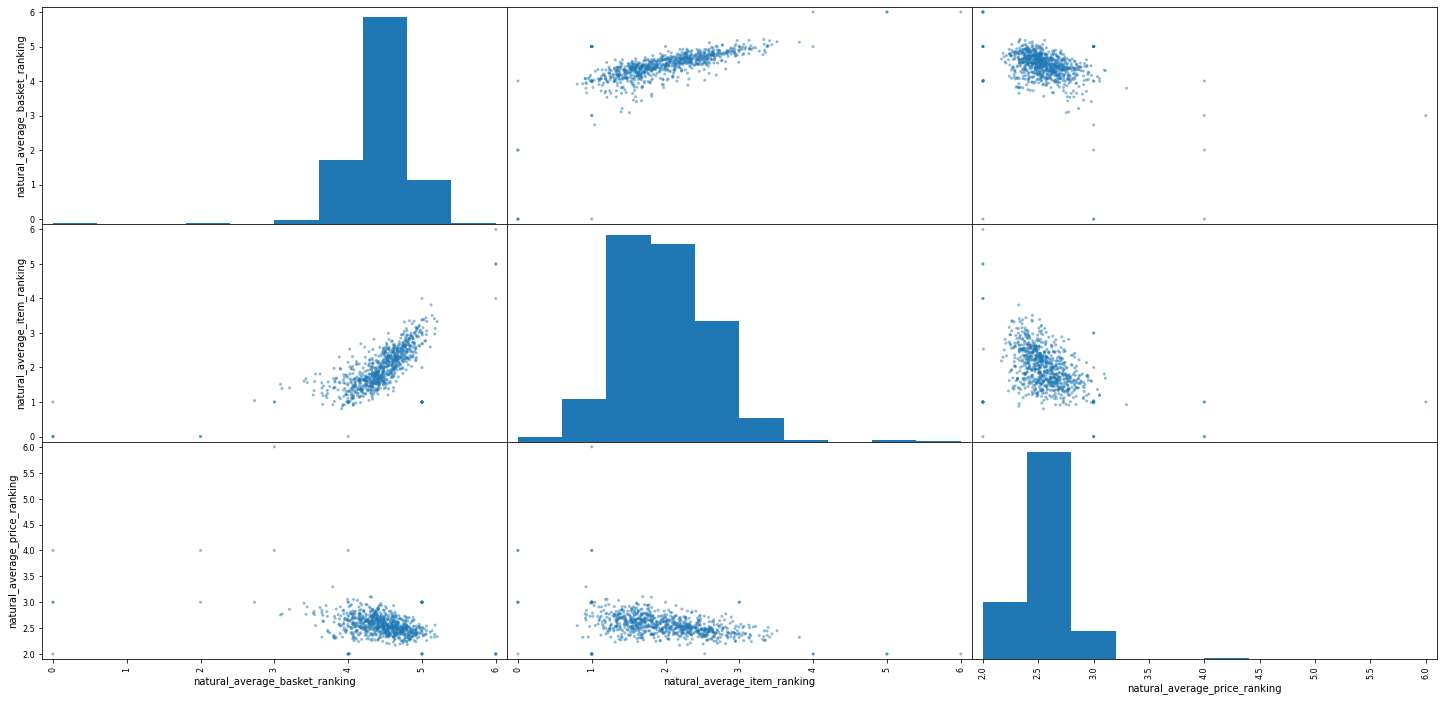

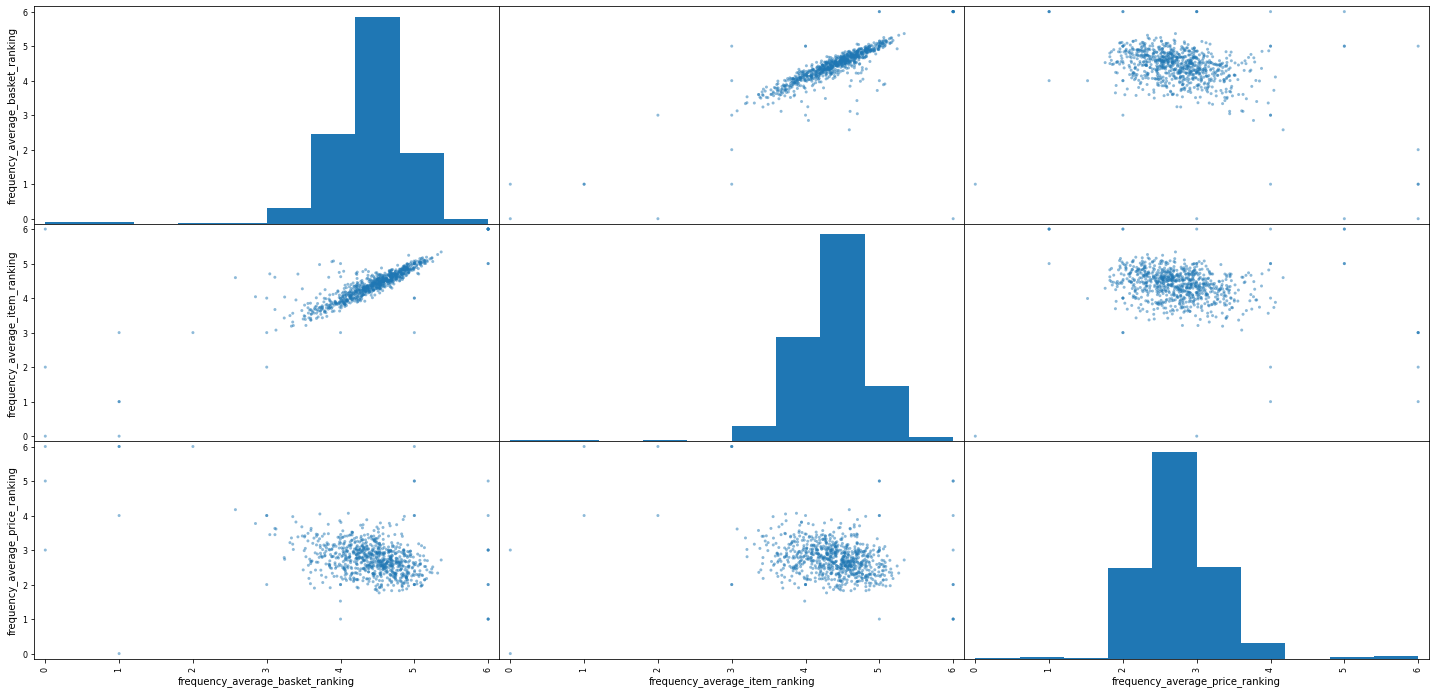

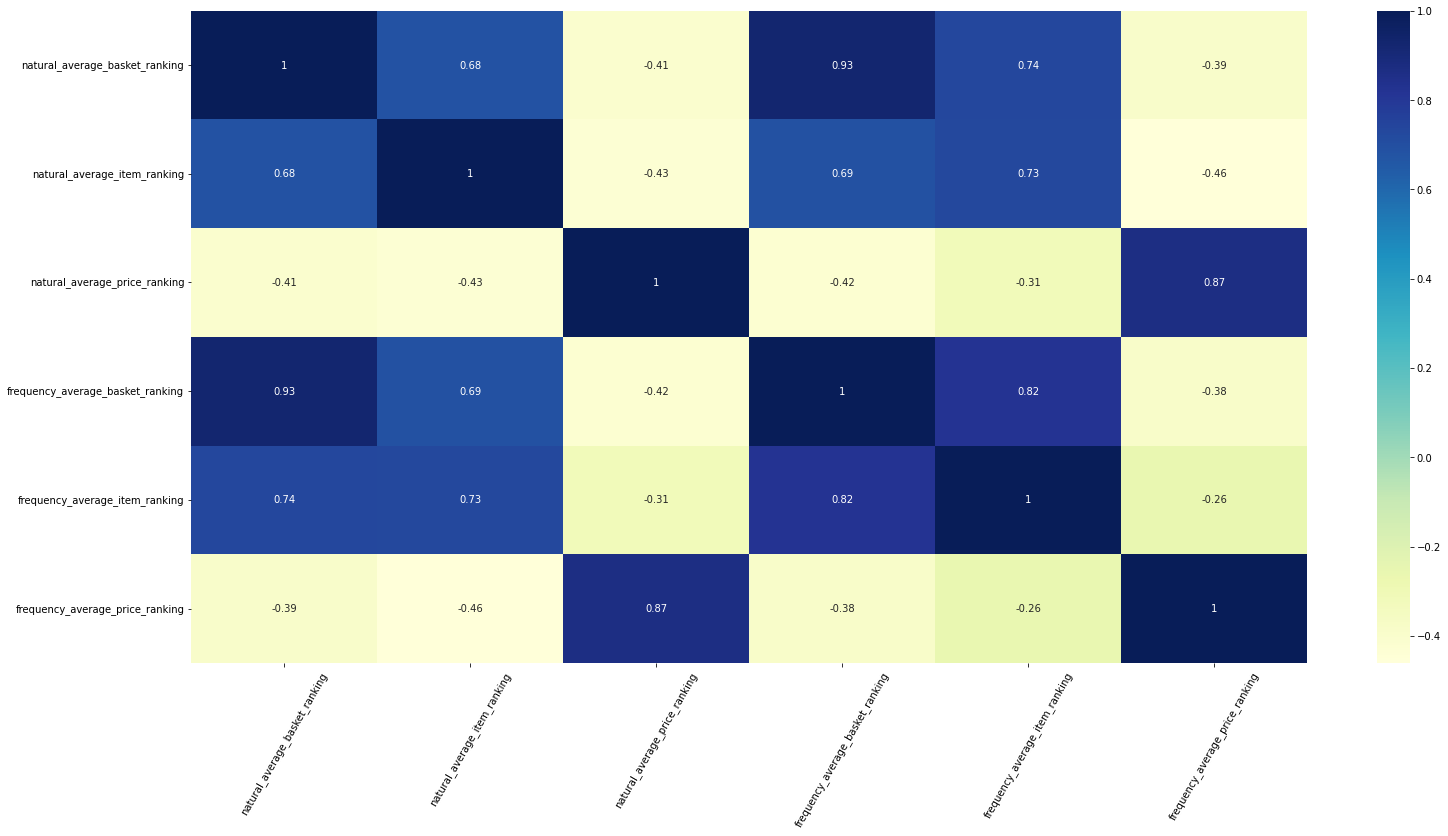

Removed features: ['item_dist_count', 'item_entropy', 'total_price', 'basket_count', 'shop_count', 'frequency_average_basket_ranking', 'frequency_average_price_ranking']


In [82]:
clustering_df = ranking_and_elimination(u_df, s_df)

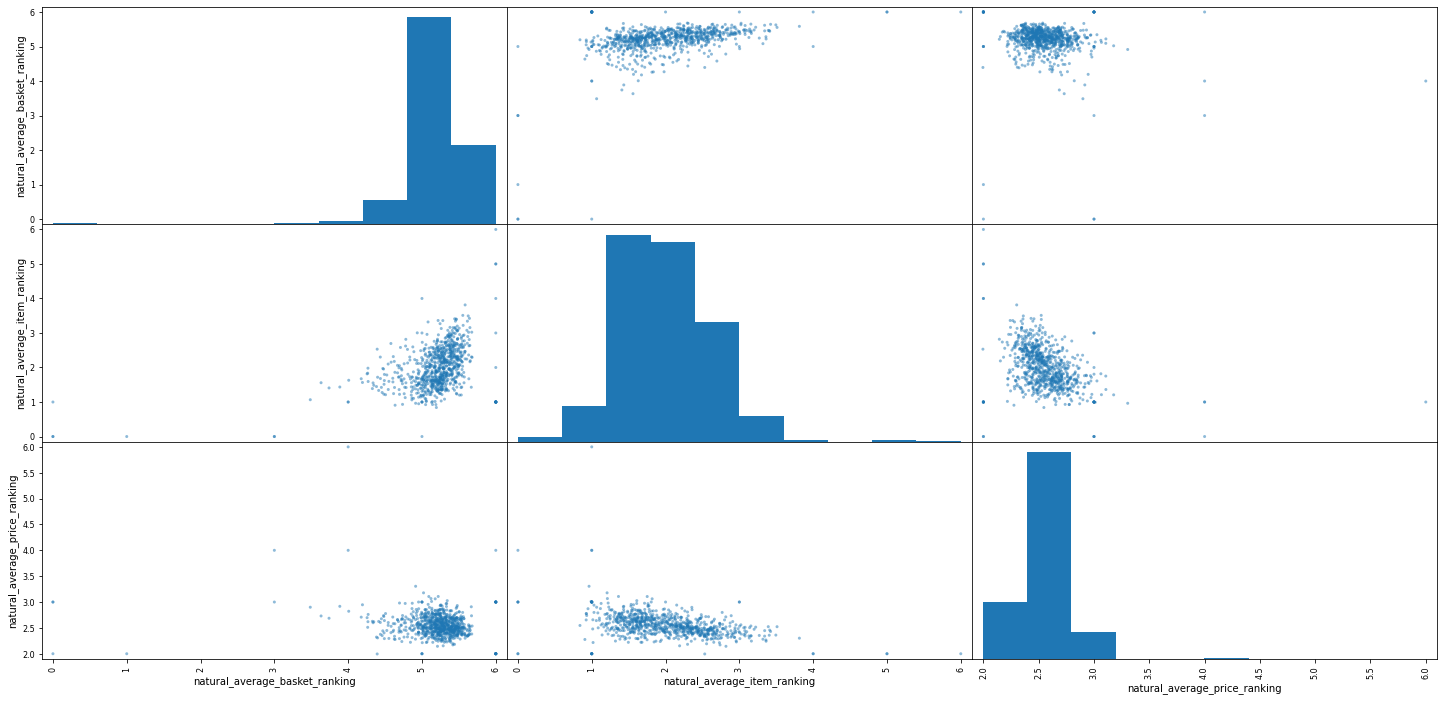

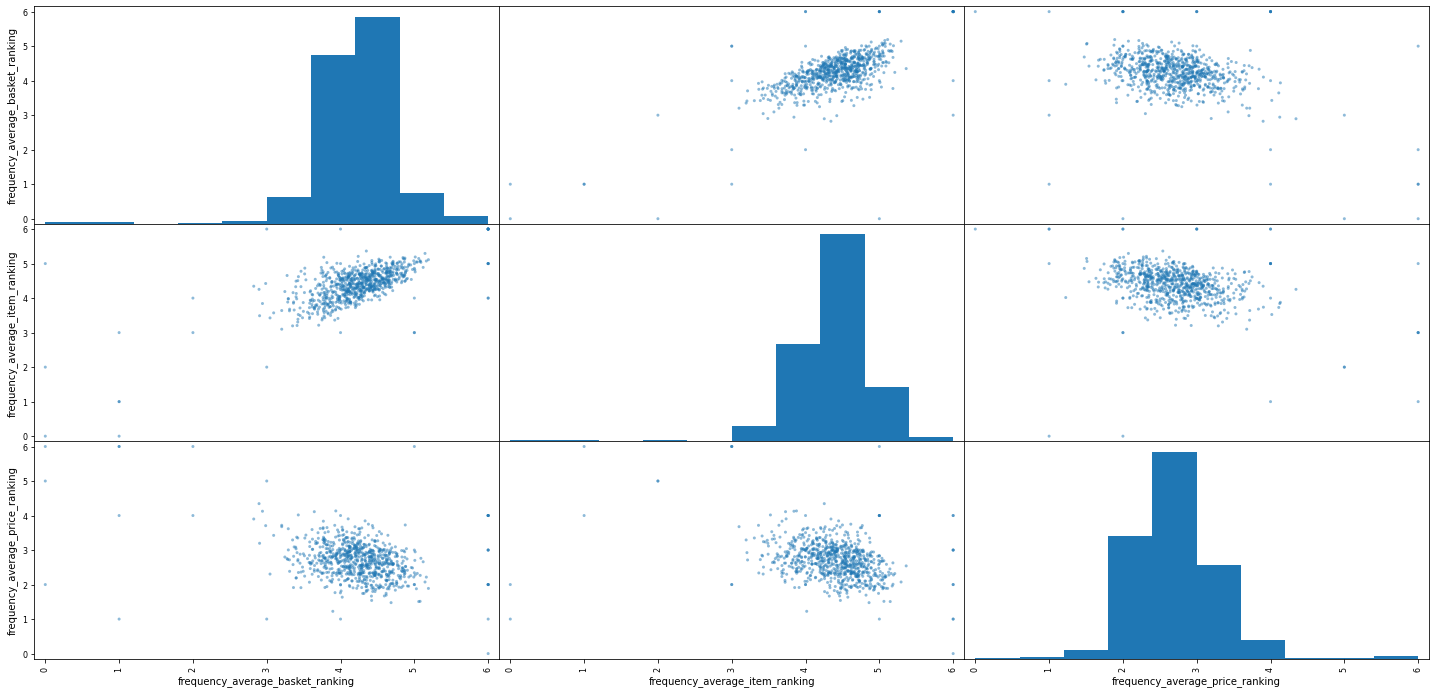

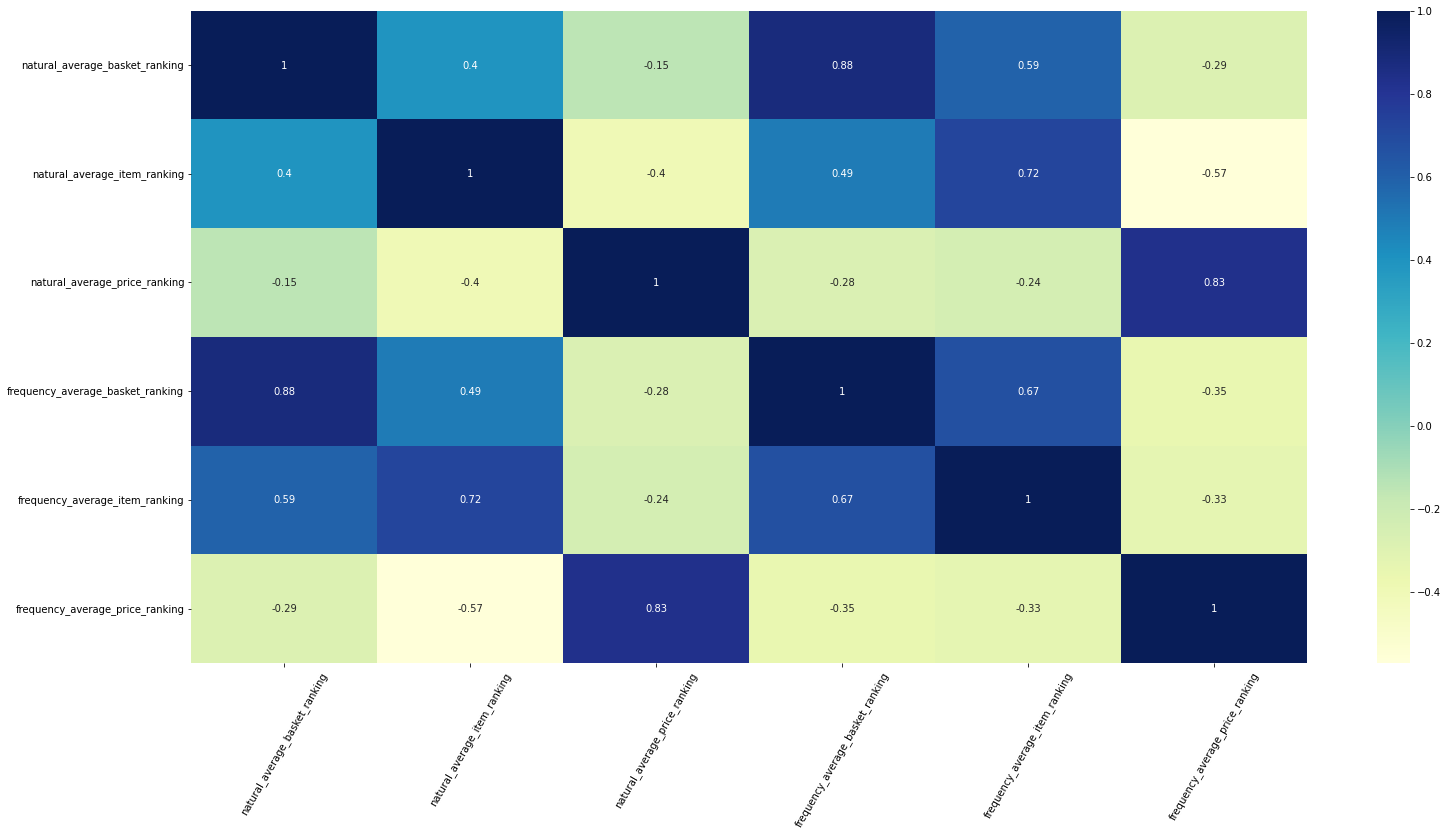

Removed features: ['item_dist_count', 'item_entropy', 'total_price', 'basket_count', 'shop_count', 'frequency_average_basket_ranking']


In [83]:
pure_clustering_df = ranking_and_elimination(pure_u_df, pure_s_df)

In [84]:
with open(f'{PICKLE_FOLDER}clustering_df.pkl', 'wb') as f:
    pickle.dump(clustering_df, f)

with open(f'{PICKLE_FOLDER}pure_clustering_df.pkl', 'wb') as f:
    pickle.dump(pure_clustering_df, f)

with open(f'{PICKLE_FOLDER}user_selected_df.pkl', 'wb') as f:
    pickle.dump(u_df, f)

with open(f'{PICKLE_FOLDER}pure_user_selected_df.pkl', 'wb') as f:
    pickle.dump(pure_u_df, f)